In [1]:
from keras import models
from keras import layers

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2018)

/Users/nc374/anaconda/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# constants
npts = 100 # points per blob
tot_npts = 4*npts # total number of points 
s = 0.005 # ~standard deviation
sigma = np.array([[s, 0], [0, s]]) #cov matrix

In [208]:
def plot_data(X, y,title_str):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    plt.figure(figsize=(20,10))
    plt.scatter(X[y==0,0], X[y==0,1],c='r', s=200, alpha=0.4)
    plt.scatter(X[y==1,0], X[y==1,1],c='b', s=200, alpha=0.4)
    plt.title(title_str,fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlim(amin, amax)
    plt.ylim(bmin, bmax)
    plt.grid('on')
    plt.show()

In [209]:
# Generate Data
data1 = np.random.multivariate_normal( [0,0], sigma, npts)
data2 = np.random.multivariate_normal( [0,1], sigma, npts)
data3 = np.random.multivariate_normal( [1,0], sigma, npts)
data4 = np.random.multivariate_normal( [1,1], sigma, npts)

xor_data = np.concatenate((data1, data4, data2, data3))
xor_labels = np.concatenate((np.ones((2*npts)),np.zeros((2*npts))))

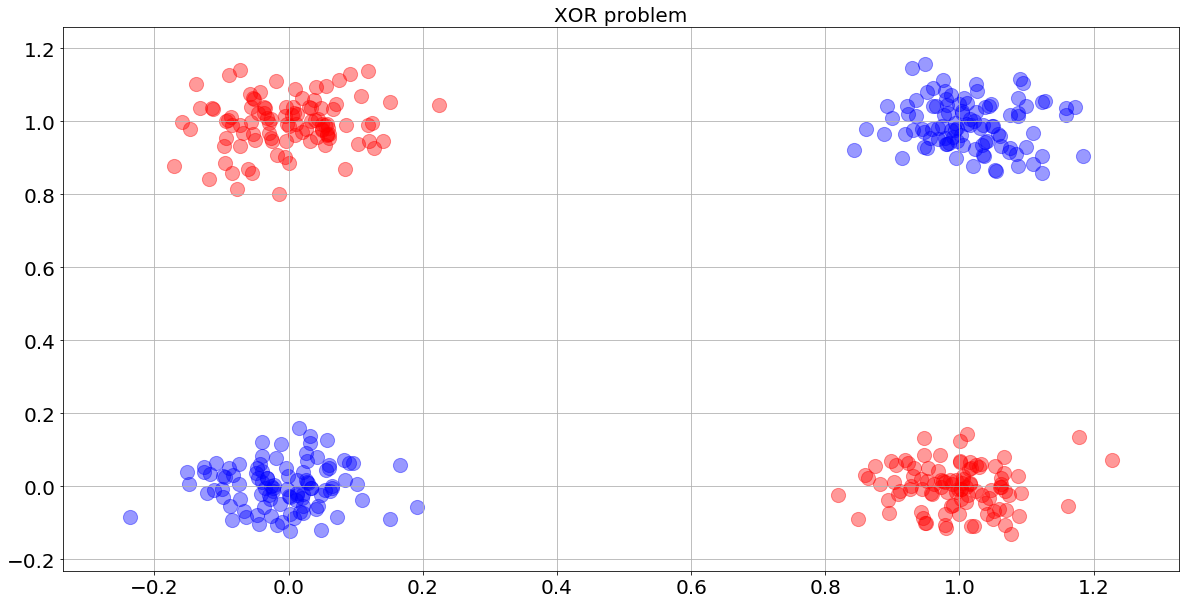

In [210]:
plot_data(xor_data, xor_labels,'XOR problem')

In [80]:
epo=200
bs=32
ve=0

model = models.Sequential()
model_2_1 = models.Sequential()
model_2_1.add(layers.Dense(16, activation='relu', input_shape=(2,)))
model_2_1.add(layers.Dense(1, activation='sigmoid'))
model_2_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_2_1 = model_2_1.fit(xor_data, xor_labels, epochs=epo, batch_size=bs, verbose=ve).history
decision_boundary_2_1 = lambda x: model_2_1.predict(xor_data)

model_8_1 = models.Sequential()
model_8_1.add(layers.Dense(8, activation='relu', input_shape=(2,)))
model_8_1.add(layers.Dense(1, activation='sigmoid'))
model_8_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_8_1 = model_8_1.fit(xor_data, xor_labels, epochs=epo, batch_size=bs, verbose=ve).history
decision_boundary_8_1 = lambda x: model_8_1.predict(xor_data)

model_16_1 = models.Sequential()
model_16_1.add(layers.Dense(16, activation='relu', input_shape=(2,)))
model_16_1.add(layers.Dense(1, activation='sigmoid'))
model_16_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_16_1 = model_16_1.fit(xor_data, xor_labels, epochs=epo, batch_size=bs, verbose=ve).history
decision_boundary_16_1 = lambda x: model_16_1.predict(xor_data)

In [64]:
def plot_loss_acc(loss_values, acc_values,title_loss,title_metric):
    plt.subplot(121)
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, 'o', label=title_loss)
    plt.title(title_loss,fontsize=20)
    plt.xlabel('Epochs',fontsize=20)
    plt.ylabel('Loss',fontsize=20)
    plt.legend(['2_1','8_1','16_1'],fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    plt.subplot(122)
    epochs = range(1, len(acc_values) + 1)
    plt.plot(epochs, acc_values, 'o', label=title_metric)
    plt.title(title_metric,fontsize=20)
    plt.xlabel('Epochs',fontsize=20)
    plt.ylabel('Accuracy',fontsize=20)
    plt.legend(['2_1','8_1','16_1'],fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

/Users/nc374/anaconda/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


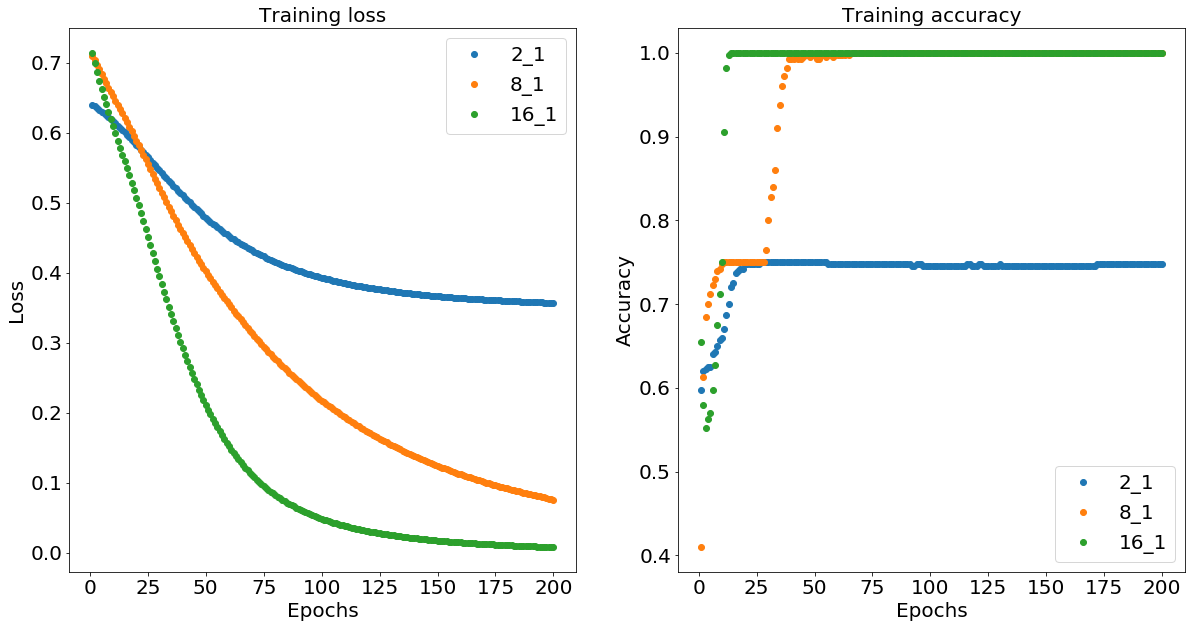

In [66]:
plt.figure(figsize=(20,10))
plot_loss_acc(history_dict_2_1['loss'], history_dict_2_1['acc'],
                             'Training loss','Training accuracy')
plot_loss_acc(history_dict_8_1['loss'], history_dict_8_1['acc'],
                             'Training loss','Training accuracy')
plot_loss_acc(history_dict_16_1['loss'], history_dict_16_1['acc'],
                             'Training loss','Training accuracy')
plt.show()

In [227]:
from matplotlib.colors import ListedColormap
def plot_decision_boundary(func, X, y, figsize=(20, 10)):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    c = func(ab)
    cc = c.reshape(aa.shape)

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    fig, ax = plt.subplots(figsize=figsize)
    contour = plt.contourf(aa, bb, cc, cmap=cm, alpha=0.7)
    
    ax_c = fig.colorbar(contour)
    ax_c.set_ticks([0, 0.25, 0.5, 0.75, 1])
    ax_c.ax.tick_params(labelsize=20)
    
    
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    plt.scatter(X[y==0,0], X[y==0,1],c='r', s=200, alpha=0.7)
    plt.scatter(X[y==1,0], X[y==1,1],c='b', s=200, alpha=0.7)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlim(amin, amax)
    plt.ylim(bmin, bmax)
    plt.grid('on')

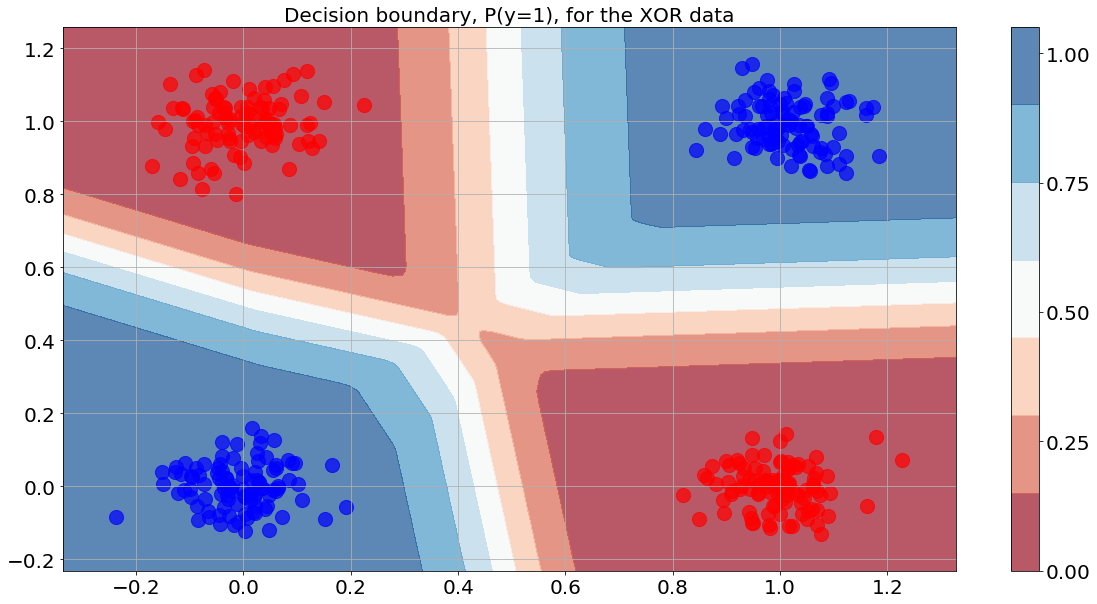

In [229]:
plot_decision_boundary(lambda x: model_2_1.predict(x), xor_data, xor_labels)
plt.title('Decision boundary, P(y=1), for the XOR data',fontsize=20)
#plt.tight_layout()
plt.show()